### Import Python packages

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [2]:
raw_data = pd.read_csv('TG_STAID002759.txt', sep=',', header=14)

In [3]:
raw_data

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53717,111448,20230127,16,0
53718,111448,20230128,1,0
53719,111448,20230129,11,0
53720,111448,20230130,38,0


### Rename column names
drop SQUID column

In [4]:
# drop first column
data = raw_data.drop(raw_data.columns[0], axis=1)
# change column name 
data.columns = ['Date', 'Temperature', 'quality']

In [5]:
data

,Date,Temperature,quality
0,18760101,22,0
1,18760102,25,0
2,18760103,3,0
3,18760104,-58,0
4,18760105,-98,0
...,...,...,...
53717,20230127,16,0
53718,20230128,1,0
53719,20230129,11,0
53720,20230130,38,0


### Parse date data

In [6]:
data['datetime'] = pd.to_datetime(data['Date'], format='%Y%m%d')

In [7]:
data

,Date,Temperature,quality,datetime
0,18760101,22,0,1876-01-01
1,18760102,25,0,1876-01-02
2,18760103,3,0,1876-01-03
3,18760104,-58,0,1876-01-04
4,18760105,-98,0,1876-01-05
...,...,...,...,...
53717,20230127,16,0,2023-01-27
53718,20230128,1,0,2023-01-28
53719,20230129,11,0,2023-01-29
53720,20230130,38,0,2023-01-30


### Convert Temperature to °C

In [8]:
data['Temperature'] = data['Temperature']/10

In [9]:
#data

### Restructure the data table 

In [10]:
#### drop column with date
data = data.drop('Date', axis=1)
#### assigne datetime as index of the table
data.set_index('datetime', inplace=True)

In [11]:
#data

### Check data quality 

In [12]:
data.value_counts('quality') # (0='valid'; 1='suspect'; 9='missing')

quality
0    53527
9      195
dtype: int64

In [13]:
### explore missing data
data[data['quality'] == 9]

,Temperature,quality
datetime,,
1945-04-25,-999.9,9
1945-04-26,-999.9,9
1945-04-27,-999.9,9
1945-04-28,-999.9,9
1945-04-29,-999.9,9
...,...,...
1945-11-01,-999.9,9
1945-11-02,-999.9,9
1945-11-03,-999.9,9


In [14]:
data.describe()

,Temperature,quality
count,53722.000000,53722.000000
mean,5.745501,0.032668
std,61.206108,0.541250
min,-999.900000,0.000000
25%,3.300000,0.000000
50%,9.400000,0.000000
75%,15.700000,0.000000
max,30.500000,9.000000


### Visualization and Plot

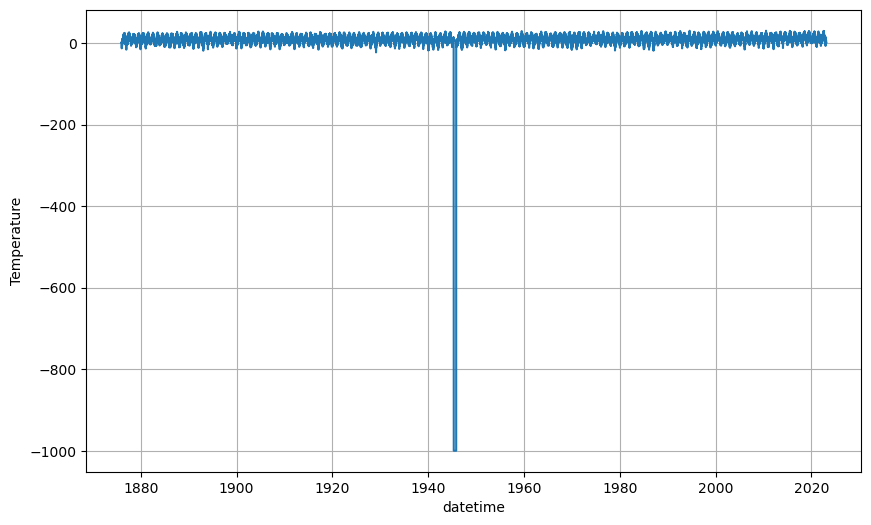

In [15]:
plt.rcParams['figure.figsize'] = (10,6)
sns.lineplot(data=data, x = data.index, y= 'Temperature')
plt.grid()

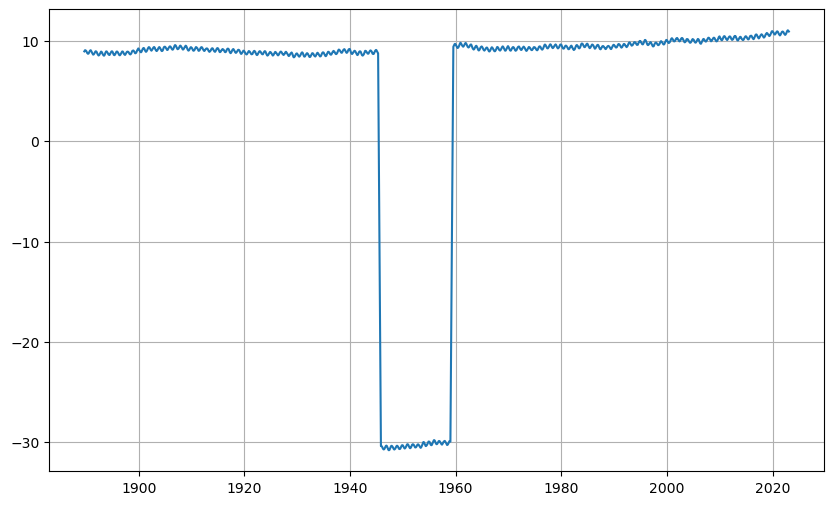

In [16]:
plt.plot(data.loc[:, 'Temperature'].rolling(5000).mean())
plt.grid()

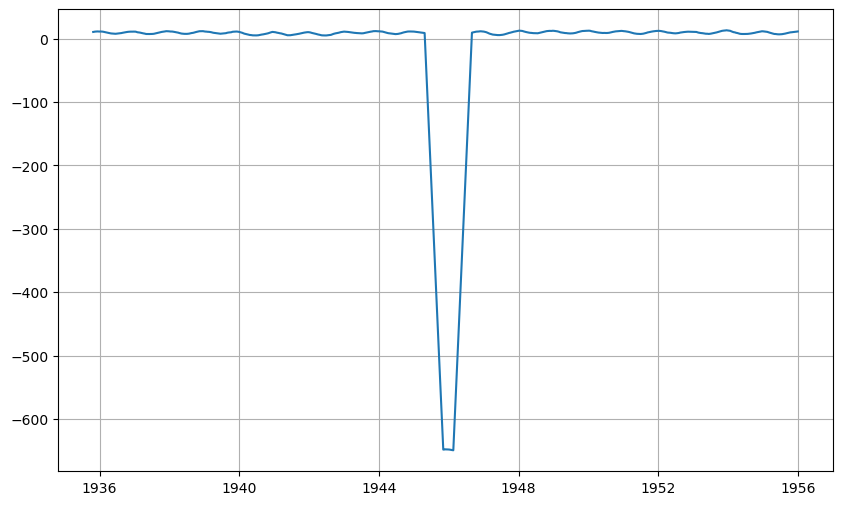

In [17]:
#Rolling Window
plt.plot(data.loc['1935-01-01':'1955-12-31', 'Temperature'].rolling(300).mean())
plt.grid()

In [18]:
## visulize data before 1945 and after 1945

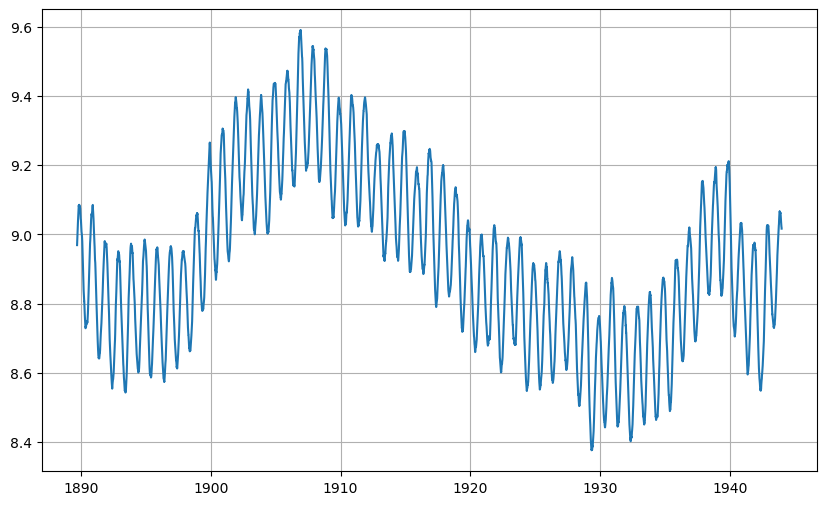

In [19]:
plt.plot(data.loc[:'1943-12-31', 'Temperature'].rolling(5000).mean())
plt.grid()

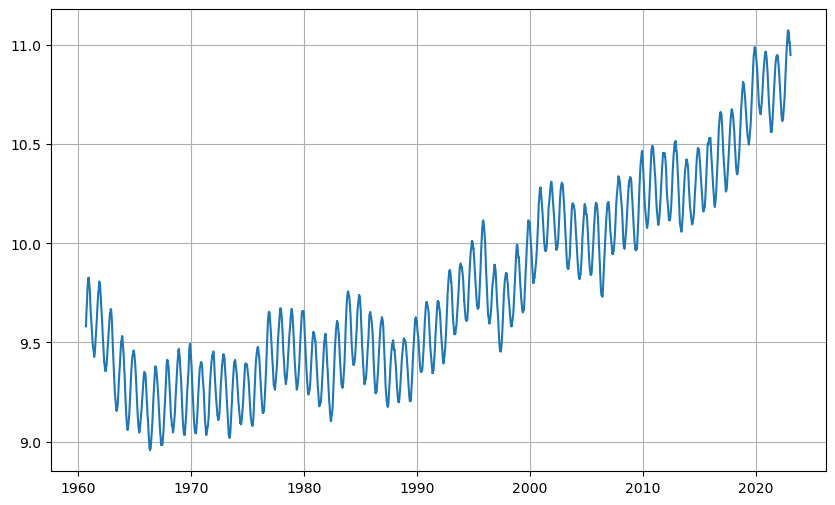

In [20]:
plt.plot(data.loc['1946-12-31':, 'Temperature'].rolling(5000).mean())
plt.grid()

In [21]:
bf = data[data.index <'1944-1-1']#
af= data[data.index >= '1946-12-31']  # extract data given range of date

In [22]:
bf.describe()

,Temperature,quality
count,24836.000000,24836.0
mean,8.931213,0.0
std,7.798310,0.0
min,-22.600000,0.0
25%,3.000000,0.0
50%,8.900000,0.0
75%,15.300000,0.0
max,28.800000,0.0


In [23]:
af.describe()

,Temperature,quality
count,27791.000000,27791.0
mean,9.874960,0.0
std,7.919909,0.0
min,-18.500000,0.0
25%,3.800000,0.0
50%,10.000000,0.0
75%,16.200000,0.0
max,30.500000,0.0


In [24]:
#sns.lineplot(data=bf, x = bf.index, y= 'Temperature')

In [25]:
#sns.lineplot(data=af, x = af.index, y= 'Temperature')

### Import scikit-learn packages

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,  mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import set_config
import sklearn
from sklearn.model_selection import cross_val_score
set_config(display="diagram") ###displays diagram from the output of the column/feature transformation
set_config(transform_output="pandas")

### Evaluate data before 1944

Trend

In [27]:
bf['timestep']=(range(len(bf)))

/tmp/ipykernel_14148/1974067378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf['timestep']=(range(len(bf)))


In [28]:
bf

,Temperature,quality,timestep
datetime,,,
1876-01-01,2.2,0,0
1876-01-02,2.5,0,1
1876-01-03,0.3,0,2
1876-01-04,-5.8,0,3
1876-01-05,-9.8,0,4
...,...,...,...
1943-12-27,5.5,0,24831
1943-12-28,6.1,0,24832
1943-12-29,4.6,0,24833


In [29]:
X = bf[['timestep']]
y = bf['Temperature']

In [30]:
ln = LinearRegression()

In [31]:
ln.fit(X, y)

LinearRegression()

In [32]:
# model trend using linear regression prediction
bf['Trend'] = ln.predict(X)

/tmp/ipykernel_14148/4244062993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf['Trend'] = ln.predict(X)


In [33]:
# model trend using coef and intercept 

In [34]:
#Coefficient 
v= ln.coef_
v[0]

-1.3203341353806995e-05

In [35]:
#Intercept
ln.intercept_

9.095165246938143

In [36]:
# store this trend in dataframe
bf['param_trend'] = ln.coef_[0] * X + ln.intercept_

/tmp/ipykernel_14148/2961468110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bf['param_trend'] = ln.coef_[0] * X + ln.intercept_


In [37]:
## Plot Trend

In [38]:
Y = ln.coef_[0] * X + ln.intercept_
#Y

In [39]:
bf.head()

,Temperature,quality,timestep,Trend,param_trend
datetime,,,,,
1876-01-01,2.2,0,0,9.095165,9.095165
1876-01-02,2.5,0,1,9.095152,9.095152
1876-01-03,0.3,0,2,9.095139,9.095139
1876-01-04,-5.8,0,3,9.095126,9.095126
1876-01-05,-9.8,0,4,9.095112,9.095112


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


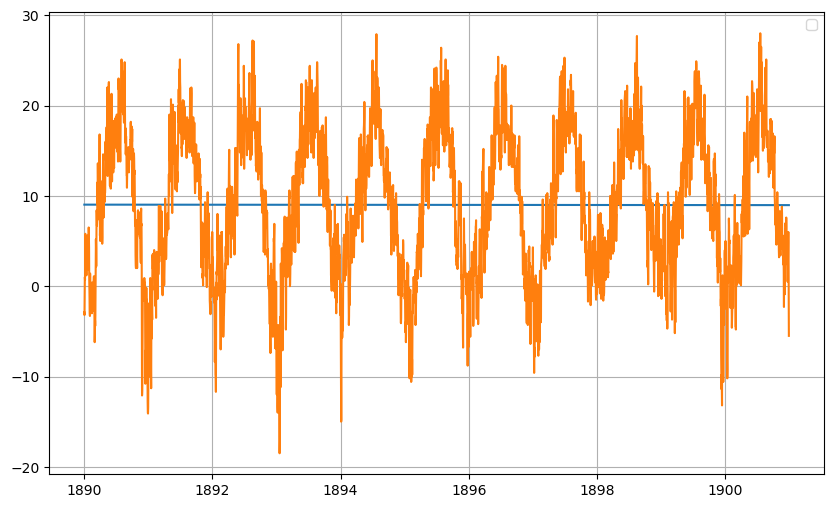

In [40]:
#plt.figure(figsize=(12, 6), dpi=150)
#ax1 = fig.add_subplot(111)
#bf['Temperature'].plot(label='Observation', color='red')
#Y['timestep'].plot(label='Trend')
plt.plot(bf.loc['1890-01-01': '1900-12-31', 'Trend'])
plt.plot(bf.loc['1890-01-01': '1900-12-31', 'Temperature'])#.rolling(5000).mean(), label='Temperature')
plt.grid()
plt.legend()

In [41]:
#sns.lineplot(data = Y, x=Y.index, y='timestep')

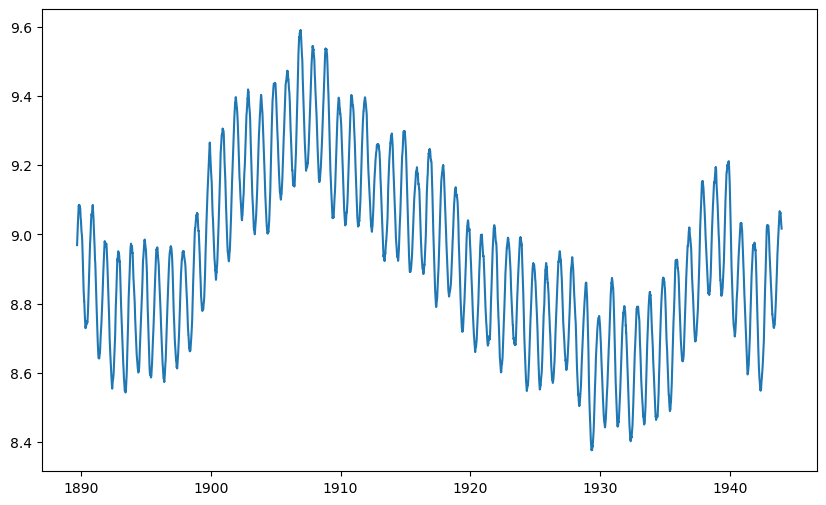

In [42]:
plt.plot(bf.loc[:'1943-12-31', 'Temperature'].rolling(5000).mean())

### Model Seasonality 

Before 1944


In [43]:
## Create dummy features for season
dummies = pd.get_dummies(bf.index.month, prefix='month', drop_first=True).set_index(bf.index)

In [44]:
dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1943-12-27,0,0,0,0,0,0,0,0,0,0,1
1943-12-28,0,0,0,0,0,0,0,0,0,0,1
1943-12-29,0,0,0,0,0,0,0,0,0,0,1


In [45]:
bf = bf.join(dummies)

In [46]:
#Define X and y

In [47]:
X = bf.drop(['Temperature','quality','Trend', 'param_trend'], axis = 1)
y= bf['Temperature']

In [48]:
# linear regression
lreg= LinearRegression()

In [49]:
lreg.fit(X,y)

LinearRegression()

In [50]:
bf['sea_trend'] = lreg.predict(X)

In [51]:
bf

,Temperature,quality,timestep,Trend,param_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,sea_trend
datetime,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,9.095165,9.095165,0,0,0,0,0,0,0,0,0,0,0,-0.249544
1876-01-02,2.5,0,1,9.095152,9.095152,0,0,0,0,0,0,0,0,0,0,0,-0.249560
1876-01-03,0.3,0,2,9.095139,9.095139,0,0,0,0,0,0,0,0,0,0,0,-0.249576
1876-01-04,-5.8,0,3,9.095126,9.095126,0,0,0,0,0,0,0,0,0,0,0,-0.249592
1876-01-05,-9.8,0,4,9.095112,9.095112,0,0,0,0,0,0,0,0,0,0,0,-0.249608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943-12-27,5.5,0,24831,8.767313,8.767313,0,0,0,0,0,0,0,0,0,0,1,0.683914
1943-12-28,6.1,0,24832,8.767300,8.767300,0,0,0,0,0,0,0,0,0,0,1,0.683898
1943-12-29,4.6,0,24833,8.767287,8.767287,0,0,0,0,0,0,0,0,0,0,1,0.683882


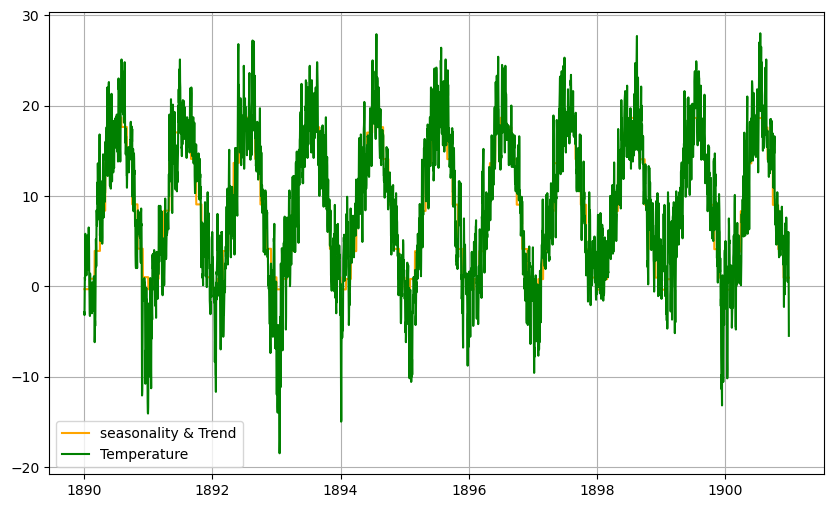

In [52]:
plt.plot(bf.loc['1890-01-01': '1900-12-31', 'sea_trend'], color='orange', label = 'seasonality & Trend') #bf['sea_trend'].plot(label='Trend')
plt.plot(bf.loc['1890-01-01': '1900-12-31', 'Temperature'], color = 'green', label = 'Temperature')#.rolling(5000).mean(), label='Temperature')
plt.grid()
plt.legend()
#bf[['Temperature', 'sea_trend']].plot()

In [53]:
# Features expansionn -- Polynomials features 
from sklearn.preprocessing import PolynomialFeatures


In [54]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [55]:
X_pol = poly.fit_transform(X)

In [56]:
ridg = Ridge(alpha=0.02)

In [57]:
ridg.fit(X_pol, y)

/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.38109e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.02)

In [58]:
bf['sea_pol'] = ridg.predict(X_pol)

In [59]:
#sea_pol

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


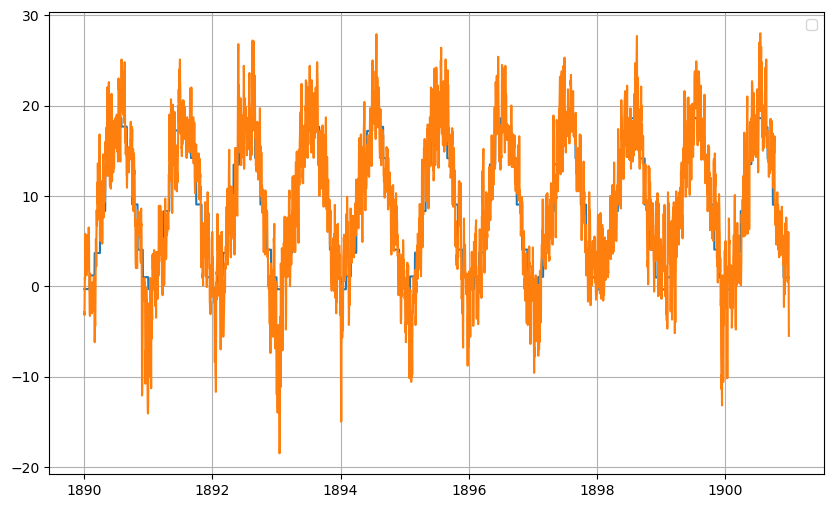

In [60]:

plt.plot(bf.loc['1890-01-01': '1900-12-31', 'sea_pol']) #bf['sea_trend'].plot(label='Trend')
plt.plot(bf.loc['1890-01-01': '1900-12-31', 'Temperature'])#.rolling(5000).mean(), label='Temperature')
plt.grid()
plt.legend()
#bf['sea_pol'].plot(label='Trend')
#plt.plot(bf.loc[:, 'Temperature'].rolling(5000).mean(), label='Temperature')
#plt.grid()
#plt.legend()

In [61]:
# Estimate remainder
bf['remainder'] = bf['Temperature'] - bf['sea_trend']
bf['remain_pol'] = bf['Temperature'] - bf['sea_pol']

In [62]:
bf[['Temperature','sea_trend', 'sea_pol','remainder','remain_pol']]

,Temperature,sea_trend,sea_pol,remainder,remain_pol
datetime,,,,,
1876-01-01,2.2,-0.249544,-0.289307,2.449544,2.489307
1876-01-02,2.5,-0.249560,-0.289311,2.749560,2.789311
1876-01-03,0.3,-0.249576,-0.289314,0.549576,0.589314
1876-01-04,-5.8,-0.249592,-0.289318,-5.550408,-5.510682
1876-01-05,-9.8,-0.249608,-0.289322,-9.550392,-9.510678
...,...,...,...,...,...
1943-12-27,5.5,0.683914,0.625463,4.816086,4.874537
1943-12-28,6.1,0.683898,0.625433,5.416102,5.474567
1943-12-29,4.6,0.683882,0.625403,3.916118,3.974597


### Model Train data

#### Model Temperature Data after 1946

In [63]:
len(af)


27791

In [64]:
## Split data into train, test and validation

In [65]:
### Train data =[1947-01-01 : 2017-11-30]
### Test data =[2017-12-01 : 2021-12-31]
### Validation data = [2021-01-1 : 2023-01-31]

In [66]:
#train_data = af[af.index<='2017-11-30']
#y_train = af[af.index<='20177-11-30', 'Temperature']
train_data = af[af.index<='2021-11-30']

In [67]:
#test_data = af.loc['2017-12-01' : '2021-12-31']
test_data = af[af.index >= '2021-12-01']

In [68]:
#validation = af[af.index >= '2021-01-01']

In [69]:
### Train the model 

In [70]:
train_data['timestep']=list(range(len(train_data)))

/tmp/ipykernel_14148/1183219184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['timestep']=list(range(len(train_data)))


In [71]:
X_train = train_data.drop(['Temperature', 'quality'], axis =1)
y_train = train_data['Temperature']

#### Model Trend - After 1946

In [72]:
linreg = LinearRegression()

In [73]:
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
train_data['Trend'] = linreg.predict(X_train)

/tmp/ipykernel_14148/378102488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Trend'] = linreg.predict(X_train)


In [75]:
## Plot train data 
train_data.head()

,Temperature,quality,timestep,Trend
datetime,,,,
1946-12-31,-1.6,0,0,8.946104
1947-01-01,-2.4,0,1,8.946171
1947-01-02,-3.5,0,2,8.946239
1947-01-03,-4.5,0,3,8.946306
1947-01-04,-12.7,0,4,8.946373


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


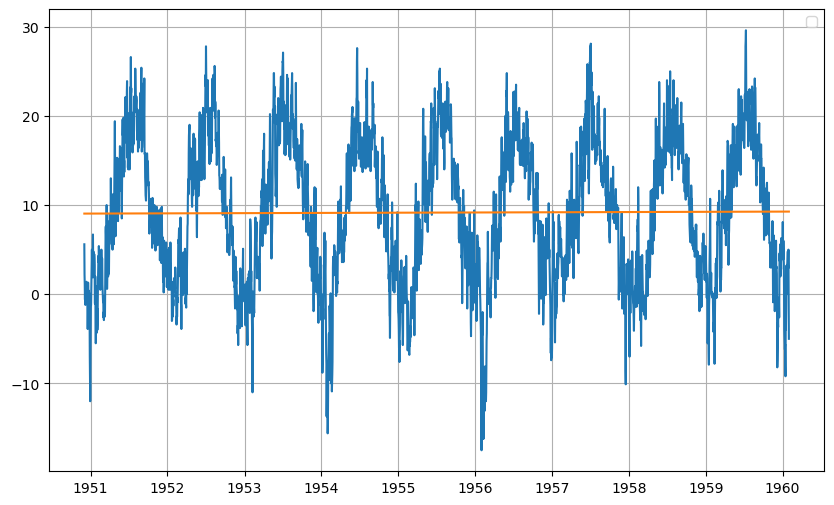

In [76]:
plt.plot(train_data.loc['1950-12-02':'1960-01-31','Temperature'])#.rolling(1500).mean(), label='Temperature')
plt.plot(train_data.loc['1950-12-02':'1960-01-31', 'Trend'])
#train_data['Trend'].plot(label= 'Trend')
plt.grid()
plt.legend()

#### Model Seasonality after 1946

In [77]:
### create dummies over month of the year

In [78]:
X_dummies = pd.get_dummies(X_train.index.month, prefix='month', drop_first=True).set_index(X_train.index)

In [79]:
X_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,
1946-12-31,0,0,0,0,0,0,0,0,0,0,1
1947-01-01,0,0,0,0,0,0,0,0,0,0,0
1947-01-02,0,0,0,0,0,0,0,0,0,0,0
1947-01-03,0,0,0,0,0,0,0,0,0,0,0
1947-01-04,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,0,0,0,0,0,0,0,0,0,1,0
2021-11-27,0,0,0,0,0,0,0,0,0,1,0
2021-11-28,0,0,0,0,0,0,0,0,0,1,0


In [80]:
# joining dummies dataset 
train_data = train_data.join(X_dummies)

In [81]:
X_train = train_data.drop(['Temperature', 'quality', 'Trend'], axis =1)
y_train = train_data['Temperature']
X_train

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,
1946-12-31,0,0,0,0,0,0,0,0,0,0,0,1
1947-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1947-01-02,2,0,0,0,0,0,0,0,0,0,0,0
1947-01-03,3,0,0,0,0,0,0,0,0,0,0,0
1947-01-04,4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,27359,0,0,0,0,0,0,0,0,0,1,0
2021-11-27,27360,0,0,0,0,0,0,0,0,0,1,0
2021-11-28,27361,0,0,0,0,0,0,0,0,0,1,0


In [82]:
#X_ex = poly.fit_transform(X_train)

In [83]:
linreg.fit(X_train, y_train)

LinearRegression()

In [84]:
train_data['Seasonality_trend'] = linreg.predict(X_train)

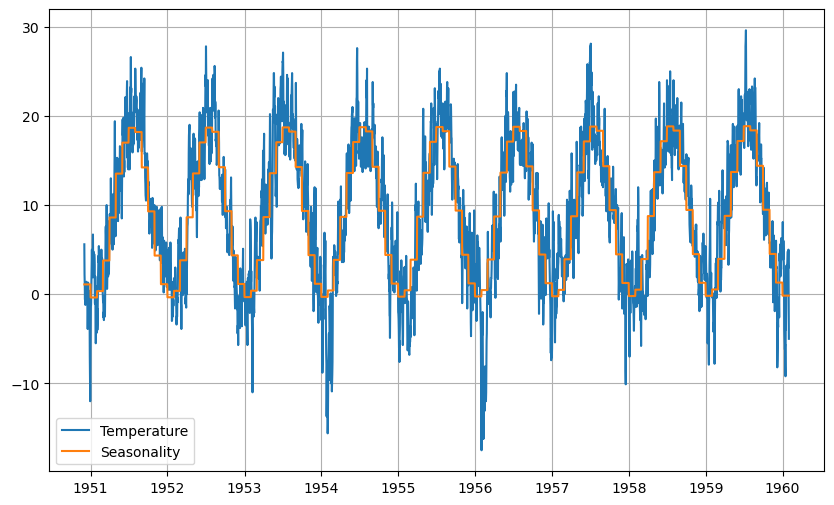

In [85]:
plt.plot(train_data.loc['1950-12-02':'1960-01-31','Temperature'], label='Temperature')#.rolling(1500).mean(), label='Temperature')
plt.plot(train_data.loc['1950-12-02':'1960-01-31', 'Seasonality_trend'], label= 'Seasonality')#.rolling(1500).mean(), label= 'Seasonality')
plt.grid()
plt.legend()

In [86]:
# Estimate the remainder from prediction and true value
train_data['remainder'] = train_data['Temperature'] - train_data['Seasonality_trend']

#### Time lag features
The question of how many lags to include should be answered by analyzing the remainder, 
not the original variable.

This is because in the remainder we got rid of effects of 
trend and seasonality and can observe the pure effect of time dependence.

In [87]:
train_data['lag1'] = train_data['remainder'].shift(1)
train_data['lag2'] = train_data['remainder'].shift(2)
train_data['lag3'] = train_data['remainder'].shift(3)

<AxesSubplot:>

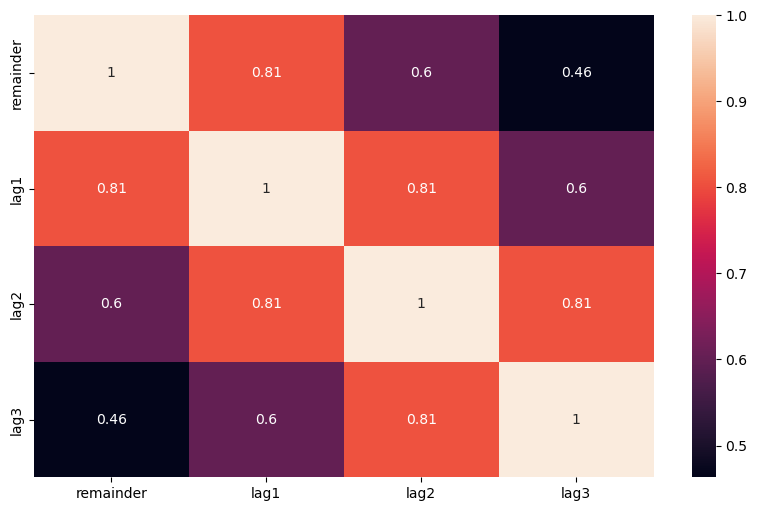

In [88]:
sns.heatmap(train_data[['remainder','lag1','lag2', 'lag3']].corr(), annot=True)


In [89]:
## lag3 has no significant correlation with the remainder
train_data = train_data.drop(['lag3'], axis = 1)

/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


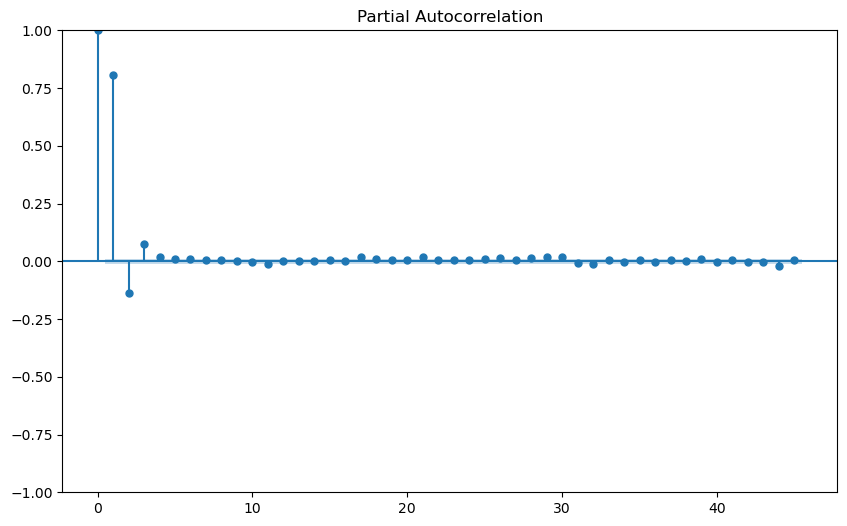

In [90]:
## verify that assumption using statsmodels
#Box-Jenkins-Method tells us how to choose lags: we choose all "significant" lags, 
#i.e. the ones that fall outside the 95% confidence internval in PACF plot.
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(train_data['remainder']);

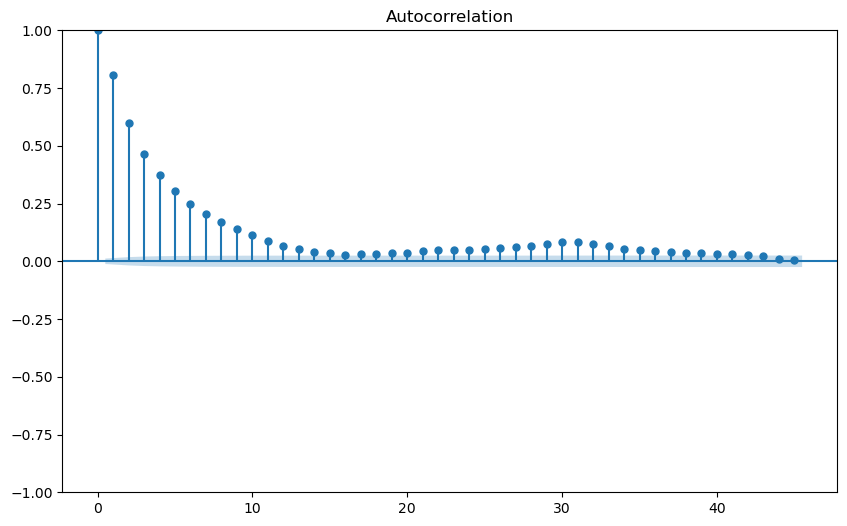

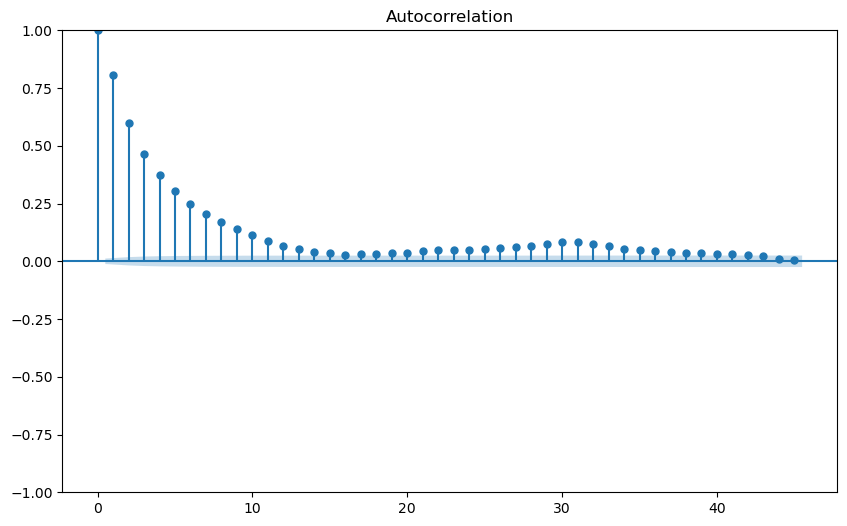

In [91]:
plot_acf(train_data['remainder'])

In [92]:
train_data.tail()

,Temperature,quality,timestep,Trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Seasonality_trend,remainder,lag1,lag2
datetime,,,,,,,,,,,,,,,,,,,
2021-11-26,4.4,0,27359,10.786831,0,0,0,0,0,0,0,0,0,1,0,5.937420,-1.537420,-1.437357,0.962705
2021-11-27,1.9,0,27360,10.786898,0,0,0,0,0,0,0,0,0,1,0,5.937483,-4.037483,-1.537420,-1.437357
2021-11-28,1.9,0,27361,10.786966,0,0,0,0,0,0,0,0,0,1,0,5.937545,-4.037545,-4.037483,-1.537420
2021-11-29,2.4,0,27362,10.787033,0,0,0,0,0,0,0,0,0,1,0,5.937608,-3.537608,-4.037545,-4.037483
2021-11-30,3.4,0,27363,10.787100,0,0,0,0,0,0,0,0,0,1,0,5.937670,-2.537670,-3.537608,-4.037545


In [93]:
train_data = train_data.dropna()

####  Model the remainder

In [94]:
x = train_data[['lag1', 'lag2']]
y = train_data['remainder']

In [95]:
m = LinearRegression()

In [96]:
m.fit(x,y)

LinearRegression()

In [97]:
train_data['rem_pre'] = m.predict(x)

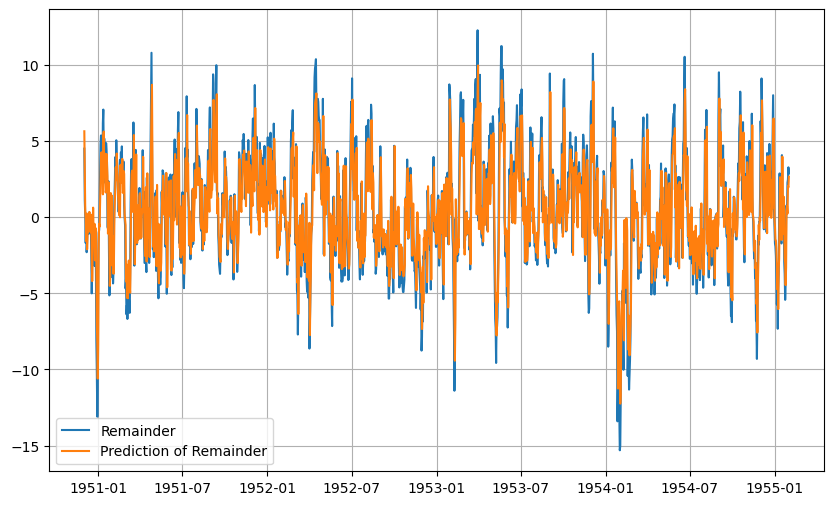

In [98]:
plt.plot(train_data.loc['1950-12-02':'1955-01-31','remainder'], label='Remainder')
plt.plot(train_data.loc['1950-12-02':'1955-01-31', 'rem_pre'], label= 'Prediction of Remainder')
plt.grid()
plt.legend()

##### From here, prediction can be obtained following the steps 
    - model seasonal_trend 
        - predict Y_value (Y_sea) from seasonal_trend
        - Estimate remainder from trend and seasonality
    - model the remainder 
        -predict Y_value (Y_rem) from remainder
    - Estimate prediction of the Target
        - Y_pred = Y_sea + Y_rem
        

#### Model the Temperature 
Now that we define Time lag features - we use them along with the timestep that we have create
The linear model is then train taking into account trend seasonality and remainder  

In [99]:
# define x and y
X_lag = train_data.drop(['remainder', 'Temperature', 'quality', 'Seasonality_trend', 'Trend', 'rem_pre'], axis = 1)
y_lag = train_data['Temperature']

In [100]:
X_lag.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2
datetime,,,,,,,,,,,,,,
1947-01-02,2,0,0,0,0,0,0,0,0,0,0,0,-1.942901,-2.610493
1947-01-03,3,0,0,0,0,0,0,0,0,0,0,0,-3.042963,-1.942901
1947-01-04,4,0,0,0,0,0,0,0,0,0,0,0,-4.043026,-3.042963
1947-01-05,5,0,0,0,0,0,0,0,0,0,0,0,-12.243088,-4.043026
1947-01-06,6,0,0,0,0,0,0,0,0,0,0,0,-14.543151,-12.243088


In [101]:
lag_m = LinearRegression()

In [102]:
lag_m.fit(X_lag, y_lag)

LinearRegression()

In [103]:
train_data['Prediction'] = lag_m.predict(X_lag)

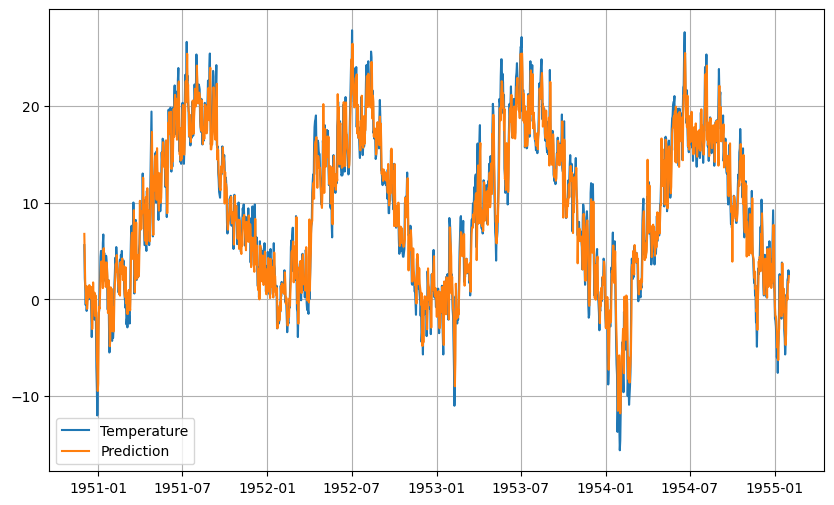

In [104]:
plt.plot(train_data.loc['1950-12-02':'1955-01-31','Temperature'], label='Temperature')
plt.plot(train_data.loc['1950-12-02':'1955-01-31', 'Prediction'], label= 'Prediction')
plt.grid()
plt.legend()

#### Evaluation metrics train data

In [105]:
lag_m.score(X_lag, y_lag)

0.9143773977110173

### Evaluate Test data

In [106]:
test_data['timestep'] = range(len(test_data))
test_data.head()

/tmp/ipykernel_14148/3324182962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['timestep'] = range(len(test_data))


,Temperature,quality,timestep
datetime,,,
2021-12-01,5.9,0,0
2021-12-02,2.3,0,1
2021-12-03,1.0,0,2
2021-12-04,1.5,0,3
2021-12-05,0.7,0,4


In [107]:
X_test = test_data.drop(['Temperature', 'quality'], axis=1)
y_test = test_data['Temperature']
X_test

,timestep
datetime,
2021-12-01,0
2021-12-02,1
2021-12-03,2
2021-12-04,3
2021-12-05,4
...,...
2023-01-27,422
2023-01-28,423
2023-01-29,424


In [108]:
_dummies = pd.get_dummies(X_test.index.month, prefix='month', drop_first=True).set_index(X_test.index)


In [109]:
ts_m = LinearRegression()

In [110]:
ts_m.fit(X_test, y_test)

LinearRegression()

In [111]:
#Trend
#test_data['Trend'] = ts_m.predict(X_test)

In [112]:
#Seasonality
X_test = X_test.join(_dummies)
test_data = test_data.join(_dummies)

In [113]:
ts_m.fit(X_test, y_test)

LinearRegression()

In [114]:
test_data['Seasonality_trend'] = ts_m.predict(X_test)

In [115]:
# Remainder
test_data['remainder'] = test_data['Temperature'] - test_data['Seasonality_trend']

In [116]:
test_data['lag1'] = test_data['remainder'].shift(1)
test_data['lag2'] = test_data['remainder'].shift(2)

In [117]:
test_data.head()

,Temperature,quality,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Seasonality_trend,remainder,lag1,lag2
datetime,,,,,,,,,,,,,,,,,,
2021-12-01,5.9,0,0,0,0,0,0,0,0,0,0,0,0,1,2.005060,3.894940,NaN,NaN
2021-12-02,2.3,0,1,0,0,0,0,0,0,0,0,0,0,1,2.006039,0.293961,3.894940,NaN
2021-12-03,1.0,0,2,0,0,0,0,0,0,0,0,0,0,1,2.007018,-1.007018,0.293961,3.894940
2021-12-04,1.5,0,3,0,0,0,0,0,0,0,0,0,0,1,2.007997,-0.507997,-1.007018,0.293961
2021-12-05,0.7,0,4,0,0,0,0,0,0,0,0,0,0,1,2.008976,-1.308976,-0.507997,-1.007018


In [118]:
#lag1 test (first day) --- lag1 train last day
#lag2 test (first day) --- lag2 train day before last day
#lag2 test (second day)--- lag2 train last day
test_data.loc['2021-12-01', 'lag1'] = train_data.loc['2021-11-30', 'lag1']
test_data.loc['2021-12-01', 'lag2'] = train_data.loc['2021-11-29', 'lag2']
test_data.loc['2021-12-02', 'lag2'] = train_data.loc['2021-11-30', 'lag2']


In [119]:
X_test = X_test.join(test_data[['lag1', 'lag2']])

In [120]:
#X_test = X_test.dropna()
#y_test = y_test[2:]
#X_test.head()

#### Evaluation metrics Test 

In [121]:
### Score of test data
lag_m.score(X_test, y_test)

0.7631805113516956

In [122]:
#### Prediction on train model
pred = lag_m.predict(X_test)

In [123]:
#### Accuracy score
r2_score(y_test, pred, multioutput='variance_weighted')

0.7631805113516957

#### Predicting Future Temperature
 We now add test data into the train data
 
 Test data contain : lags, dummies features and timestep

In [124]:
# Combine train and test data
model_data = pd.concat([train_data, test_data]) 
model_data.tail()

,Temperature,quality,timestep,Trend,month_2,month_3,month_4,month_5,month_6,month_7,...,month_9,month_10,month_11,month_12,Seasonality_trend,remainder,lag1,lag2,rem_pre,Prediction
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-27,1.6,0,422,NaN,0,0,0,0,0,0,...,0,0,0,0,4.434573,-2.834573,-5.133594,-3.632615,NaN,NaN
2023-01-28,0.1,0,423,NaN,0,0,0,0,0,0,...,0,0,0,0,4.435552,-4.335552,-2.834573,-5.133594,NaN,NaN
2023-01-29,1.1,0,424,NaN,0,0,0,0,0,0,...,0,0,0,0,4.436531,-3.336531,-4.335552,-2.834573,NaN,NaN
2023-01-30,3.8,0,425,NaN,0,0,0,0,0,0,...,0,0,0,0,4.437509,-0.637509,-3.336531,-4.335552,NaN,NaN
2023-01-31,4.3,0,426,NaN,0,0,0,0,0,0,...,0,0,0,0,4.438488,-0.138488,-0.637509,-3.336531,NaN,NaN


In [125]:
# Train linear regression on all data

In [126]:
X_model = model_data.drop(['Temperature', 'quality', 'Trend', 'Seasonality_trend', 'remainder', 'rem_pre', 'Prediction'], axis = 1)
y_model = model_data['Temperature']
X_model.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2
datetime,,,,,,,,,,,,,,
1947-01-02,2,0,0,0,0,0,0,0,0,0,0,0,-1.942901,-2.610493
1947-01-03,3,0,0,0,0,0,0,0,0,0,0,0,-3.042963,-1.942901
1947-01-04,4,0,0,0,0,0,0,0,0,0,0,0,-4.043026,-3.042963
1947-01-05,5,0,0,0,0,0,0,0,0,0,0,0,-12.243088,-4.043026
1947-01-06,6,0,0,0,0,0,0,0,0,0,0,0,-14.543151,-12.243088


In [127]:
linreg.fit(X_model, y_model)
#X_train = train_data[:-365]

LinearRegression()

In [128]:
# Create components for futur timestep -- 2023-02-01
timestep = model_data['timestep'].max() + 1 
months = [0] * 11
months[0] = 1
lag1 = model_data.loc['2023-01-31', 'lag1']
lag2_1 = model_data.loc['2023-01-30', 'lag2']


In [129]:
# Create data point for 1er day
day_1 = []
day_1.append(timestep)
day_1.extend(months)
day_1.append(lag1)
day_1.append(lag2_1)

In [130]:
day_1 = pd.DataFrame([day_1], columns = X_model.columns)
day_1

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2
0,27364,1,0,0,0,0,0,0,0,0,0,0,-0.637509,-4.335552


In [131]:
y_model.tail()

datetime
2023-01-27    1.6
2023-01-28    0.1
2023-01-29    1.1
2023-01-30    3.8
2023-01-31    4.3
Name: Temperature, dtype: float64

In [132]:
# predict model _ 1er Day
linreg.predict(day_1)

array([1.97434167])

#### Autoregressive Model
 Model the remainder

In [133]:
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [134]:
df_rem = model_data['remainder']

In [135]:
df_rem

datetime
1947-01-02    -3.042963
1947-01-03    -4.043026
1947-01-04   -12.243088
1947-01-05   -14.543151
1947-01-06   -15.343214
                ...    
2023-01-27    -2.834573
2023-01-28    -4.335552
2023-01-29    -3.336531
2023-01-30    -0.637509
2023-01-31    -0.138488
Name: remainder, Length: 27789, dtype: float64

#### Plot remainder

In [136]:
#sns.lineplot(data=df_rem);

##### Autocorrelation

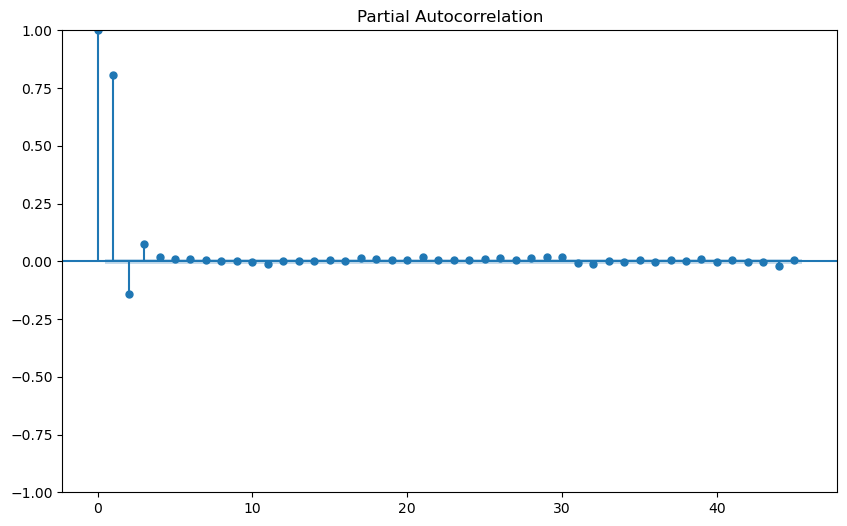

In [137]:
# Partial autocorrelation function
plot_pacf(df_rem, method="ywm");



##### Box-Jenkins-Method to choose lag

In [138]:
order = ar_select_order(df_rem, maxlag=10)


/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [139]:
order.ar_lags

[1, 2, 3]

##### Fit AutoReg model
y_t = \delta + \phi_1 y_{t-1} + \ldots + \phi_p y_{t-p} + \epsilon_t.

In [140]:
ar_m = AutoReg(df_rem, lags = 2, trend = "n").fit()

/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [141]:
## model summary
ar_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                27789
Model:                     AutoReg(2)   Log Likelihood              -62775.005
Method:               Conditional MLE   S.D. of innovations              2.317
Date:                Tue, 11 Apr 2023   AIC                         125556.011
Time:                        14:21:35   BIC                         125580.708
Sample:                    01-04-1947   HQIC                        125563.964
                         - 01-31-2023                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
remainder.L1     0.9169      0.006    154.360      0.000       0.905       0.929
remainder.L2    -0.1396      0.006    -23.498      0.000      -0.151      -0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3809           +0.0000j            1.3809            0.0000
AR.2            5.1882           +0.0000j            5.1882            0.0000
-----------------------------------------------------------------------------
"""

In [142]:
# Predict remainder 
rem_predict = ar_m.predict()
rem_predict

1947-01-02          NaN
1947-01-03          NaN
1947-01-04    -3.282442
1947-01-05   -10.661767
1947-01-06   -11.626181
                ...    
2023-01-27    -4.200115
2023-01-28    -1.882553
2023-01-29    -3.579756
2023-01-30    -2.454208
2023-01-31    -0.118830
Freq: D, Length: 27789, dtype: float64

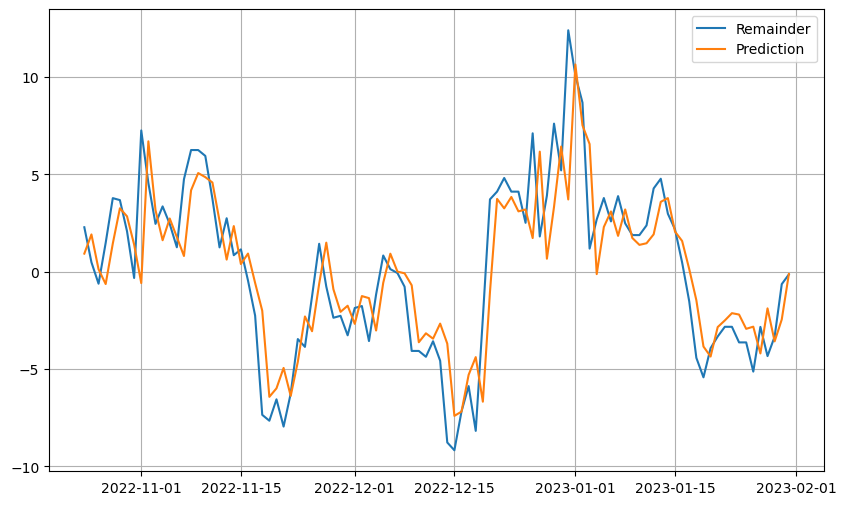

In [143]:
plt.plot(df_rem[27689:], label='Remainder')
plt.plot(rem_predict[27689:], label= 'Prediction')
plt.grid()
plt.legend()

In [144]:
df_rem.shape

(27789,)

##### Forecast remainder for 10 days in the futur

In [145]:
rem_f = ar_m.predict(start = 27789, end =  27839)

/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [164]:
#rem_f

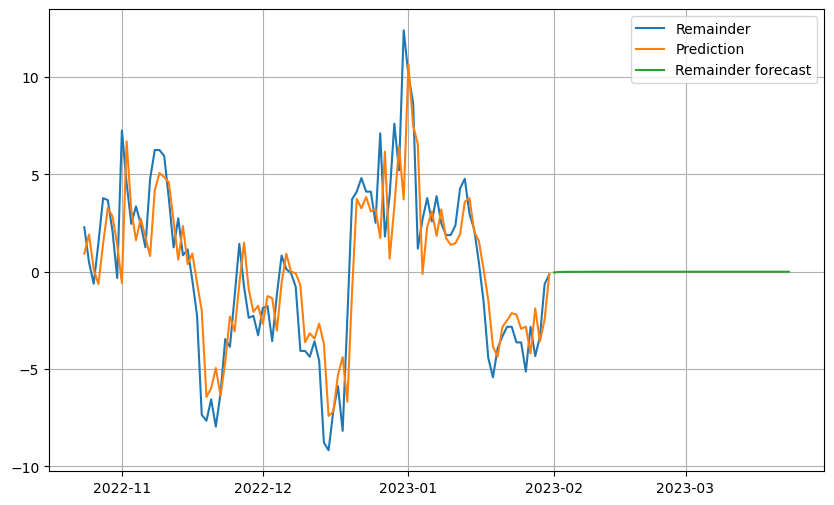

In [147]:
plt.plot(df_rem[27689:], label='Remainder')
plt.plot(rem_predict[27689:], label= 'Prediction')
plt.plot(rem_f, label='Remainder forecast')
plt.grid()
plt.legend()

##### Predict Temperature for 5 days 

In [148]:
# Create components for futur timestep -- 2023-02-02
timestep2 = model_data['timestep'].max() + 2 
months2 = [0] * 11
months2[1] = 1
lag1 = rem_f[0]
lag2_2 = model_data.loc['2023-01-31', 'lag2']

In [149]:
# Create data point for 2nd day
day_2 = []
day_2.append(timestep2)
day_2.extend(months2)
day_2.append(lag1)
day_2.append(lag2_2)

In [150]:
day_2 = pd.DataFrame([day_2], columns = X_model.columns)
day_2

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2
0,27365,0,1,0,0,0,0,0,0,0,0,0,-0.037999,-3.336531


In [151]:
# predict model _ 2nd Day
linreg.predict(day_2)

array([5.7725986])

##### ARIMA 

In [152]:
#Train arima model
arima_m = ARIMA(df_rem, order = (1,0,1), trend = "n").fit() 

/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ayouba/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [153]:
# model summary 
arima_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                27789
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -62737.229
Date:                Tue, 11 Apr 2023   AIC                         125480.459
Time:                        14:21:36   BIC                         125505.156
Sample:                    01-02-1947   HQIC                        125488.412
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7367      0.005    160.068      0.000       0.728       0.746
ma.L1          0.1956      0.007     28.991      0.000       0.182       0.209
sigma2         5.3511      0.040    134.761      0.000       5.273       5.429
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):               647.62
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
arima_predict = arima_m.predict()

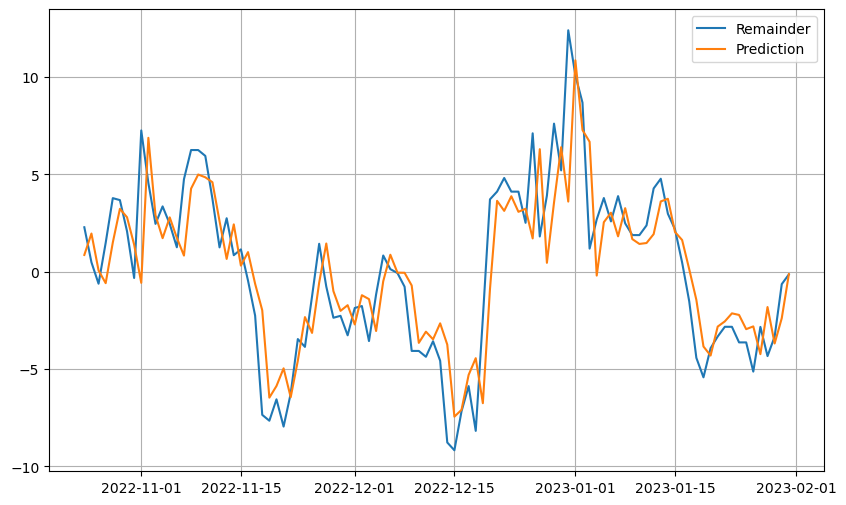

In [155]:
plt.plot(df_rem[27689:], label='Remainder')
plt.plot(arima_predict[27689:], label= 'Prediction')
plt.grid()
plt.legend()

In [156]:
# Predict remainder with ARIMA model
arm_f = arima_m.predict(start = 27789, end =  27839)

In [163]:
#arm_f

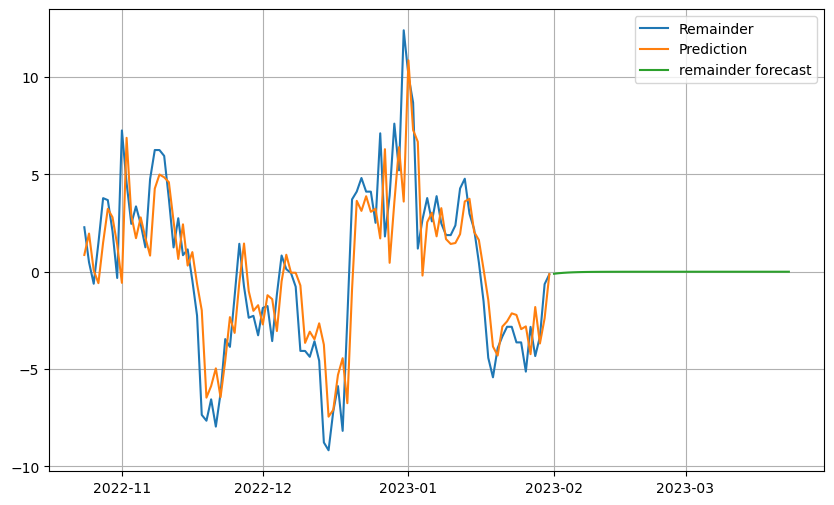

In [158]:
plt.plot(df_rem[27689:], label='Remainder')
plt.plot(arima_predict[27689:], label= 'Prediction')
plt.plot(arm_f, label = 'remainder forecast')
plt.grid()
plt.legend()

In [159]:
## Predict temperature using ARIMA
timestep2 = model_data['timestep'].max() + 2 
months2 = [0] * 11
months2[1] = 1
lag1 = arm_f[0]
lag2_2 = model_data.loc['2023-01-31', 'lag2']

In [160]:
# Create data point for 2nd day
day_2 = []
day_2.append(timestep2)
day_2.extend(months2)
day_2.append(lag1)
day_2.append(lag2_2)

In [161]:
day_2 = pd.DataFrame([day_2], columns = X_model.columns)

In [162]:
# predict model _ 2nd Day
linreg.predict(day_2)

array([5.7118403])